### Scenario
You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

#### Round 1

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (Optional) Fit a logistic Regression model on the training data.
- Fit a Knn Classifier (NOT KnnRegressor please!) model on the training data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [2]:
# convert to numeric the TotalCharges column and replace null values

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"].apply(lambda x: x.strip()))

churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [3]:
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]


In [4]:
# Test/train split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets


In [20]:
# Scaling
scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit_transform(X_test)

array([[-0.75764674, -0.44854601, -1.15727051, -0.81857737],
       [ 0.13378018, -0.44854601, -1.3837798 , -0.63853535],
       [-0.55504971, -0.44854601, -1.51439465, -0.85023335],
       ...,
       [-1.04128257, -0.44854601,  0.6680307 , -0.77203723],
       [ 1.38988174, -0.44854601, -0.34712776,  0.59164329],
       [ 1.63299817, -0.44854601, -1.48959437, -0.35050718]])

In [21]:
# KNN Classification

model_knn = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model_knn.fit(X_train, y_train) # train model
y_pred = model_knn.predict(X_test) # predict test
y_pred_train = model_knn.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [22]:
y_pred[:]

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

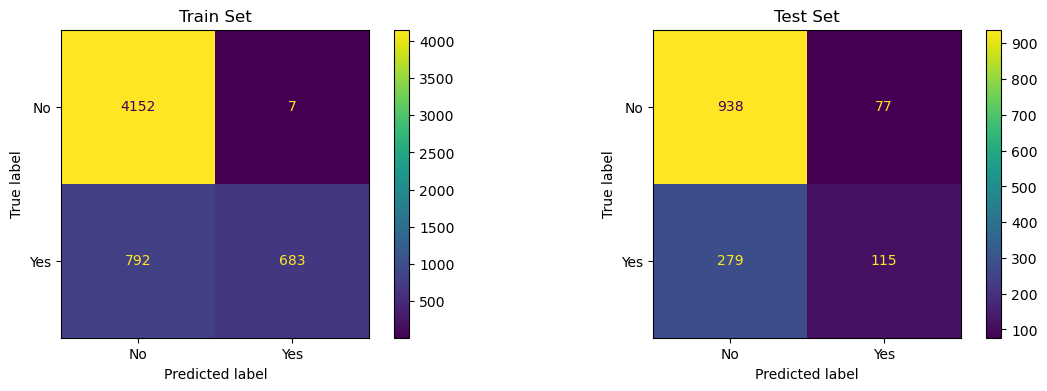

In [23]:
# KNN - Confusion Matrix
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model_knn,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model_knn,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

,Error_metric,Train,Test
0,Accuracy,0.793042,0.781405
1,Precision,0.657172,0.672000
2,Recall,0.437966,0.426396


Confusion matrix for the train set
[[3822  337]
 [ 829  646]]


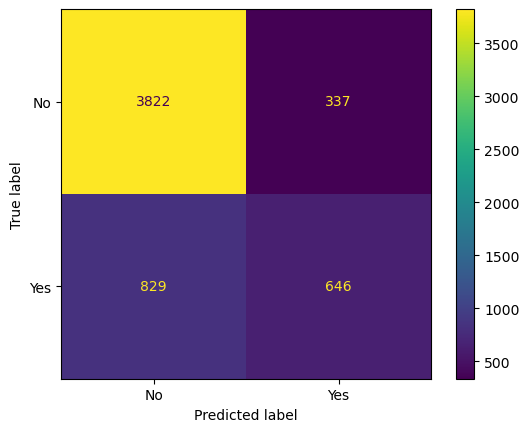



Confusion matrix for the test set
[[933  82]
 [226 168]]


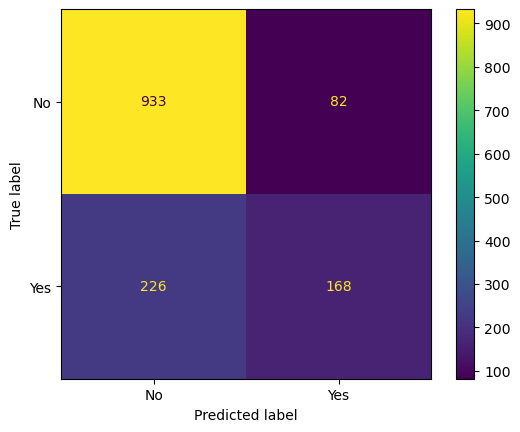

In [28]:
# Fit a Logistic Regression model on the training data

log_model = LogisticRegression()

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()